> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on GitHub
> - ▶️ Demo: [try this model in action](https://trekhleb.github.io/machine-learning-experiments)

Inspired by [Learn to Add Numbers with an Encoder-Decoder LSTM Recurrent Neural Network](https://machinelearningmastery.com/learn-add-numbers-seq2seq-recurrent-neural-networks/) article.

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import random

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.6
Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


In [52]:
from_limit = 1
to_limit = 100
examples_num = 50
numbers_to_sum = 2

In [77]:
def generate_dataset(
    examples_num=50,
    from_limit=1,
    to_limit=100,
    normalize=True
):
    X = []
    Y = []
    
    # Generating sums.
    for i in range(examples_num):
        a = random.randint(from_limit, to_limit)
        b = random.randint(from_limit, to_limit)
        X.append([a, b])
        Y.append(a + b)
    
    # Convert to float.    
    np_X = np.array(X).astype('float')
    np_Y = np.array(Y).astype('float')
    
    # Normalization.
    
    return np_X, np_Y

In [79]:
X, Y = generate_dataset(
    examples_num=examples_num,
    from_limit=from_limit,
    to_limit=to_limit
)

for equation, label in list(zip(X, Y))[:10]:
    print("{:3f} + {:3f} = {:3f}".format(equation[0], equation[1], label))
print('...')

38.000000 + 48.000000 = 86.000000
88.000000 + 62.000000 = 150.000000
86.000000 + 49.000000 = 135.000000
16.000000 + 21.000000 = 37.000000
39.000000 + 60.000000 = 99.000000
69.000000 + 69.000000 = 138.000000
45.000000 + 6.000000 = 51.000000
48.000000 + 88.000000 = 136.000000
48.000000 + 37.000000 = 85.000000
73.000000 + 31.000000 = 104.000000
...


In [37]:
np_X = np.array(X).astype('float')
np_Y = np.array(Y).astype('float')

print('np_X:\n', np_X[:10], '...\n');
print('np_Y:\n', np_Y[:10], '...')

np_X:
 [[86. 88.]
 [72. 23.]
 [68. 36.]
 [83. 13.]
 [17. 51.]
 [69.  1.]
 [32. 74.]
 [48. 49.]
 [22. 47.]
 [70. 99.]] ...

np_Y:
 [174.  95. 104.  96.  68.  70. 106.  97.  69. 169.] ...


In [38]:
def normalize(np_arr, max_val):
    return np_arr / max_val

def denormalize(np_arr, max_val):
    return np.around(np_arr * max_val)

In [39]:
norm_X = normalize(np_X, to_limit)
norm_Y = normalize(np_Y, to_limit)

print('norm_X:\n', norm_X[:10], '...\n');
print('norm_Y:\n', norm_Y[:10], '...')

norm_X:
 [[0.86 0.88]
 [0.72 0.23]
 [0.68 0.36]
 [0.83 0.13]
 [0.17 0.51]
 [0.69 0.01]
 [0.32 0.74]
 [0.48 0.49]
 [0.22 0.47]
 [0.7  0.99]] ...

norm_Y:
 [1.74 0.95 1.04 0.96 0.68 0.7  1.06 0.97 0.69 1.69] ...


In [40]:
denorm_X = denormalize(norm_X, to_limit)
denorm_Y = denormalize(norm_Y, to_limit)

print('denorm_X:\n', denorm_X[:10], '...\n');
print('denorm_Y:\n', denorm_Y[:10], '...')

denorm_X:
 [[86. 88.]
 [72. 23.]
 [68. 36.]
 [83. 13.]
 [17. 51.]
 [69.  1.]
 [32. 74.]
 [48. 49.]
 [22. 47.]
 [70. 99.]] ...

denorm_Y:
 [174.  95. 104.  96.  68.  70. 106.  97.  69. 169.] ...


In [53]:
shaped_X = norm_X.reshape(examples_num, numbers_to_sum, 1)
print(shaped_X)

[[[0.86]
  [0.88]]

 [[0.72]
  [0.23]]

 [[0.68]
  [0.36]]

 [[0.83]
  [0.13]]

 [[0.17]
  [0.51]]

 [[0.69]
  [0.01]]

 [[0.32]
  [0.74]]

 [[0.48]
  [0.49]]

 [[0.22]
  [0.47]]

 [[0.7 ]
  [0.99]]

 [[0.44]
  [0.45]]

 [[0.25]
  [0.24]]

 [[0.57]
  [0.11]]

 [[0.23]
  [0.4 ]]

 [[0.79]
  [0.51]]

 [[0.99]
  [0.9 ]]

 [[0.62]
  [0.9 ]]

 [[0.32]
  [0.84]]

 [[0.71]
  [0.41]]

 [[0.78]
  [0.03]]

 [[0.37]
  [0.37]]

 [[0.86]
  [0.93]]

 [[0.97]
  [0.08]]

 [[0.02]
  [0.98]]

 [[0.79]
  [0.54]]

 [[0.05]
  [0.7 ]]

 [[0.66]
  [0.94]]

 [[0.3 ]
  [0.3 ]]

 [[0.05]
  [0.64]]

 [[0.48]
  [0.05]]

 [[0.84]
  [0.67]]

 [[0.47]
  [1.  ]]

 [[0.23]
  [0.39]]

 [[0.42]
  [0.55]]

 [[0.18]
  [1.  ]]

 [[0.22]
  [0.28]]

 [[0.05]
  [0.67]]

 [[0.55]
  [0.25]]

 [[0.91]
  [0.36]]

 [[0.84]
  [0.57]]

 [[0.64]
  [0.89]]

 [[0.6 ]
  [0.11]]

 [[0.52]
  [0.8 ]]

 [[0.88]
  [0.36]]

 [[0.13]
  [0.32]]

 [[0.98]
  [0.03]]

 [[0.87]
  [0.64]]

 [[0.47]
  [0.89]]

 [[0.48]
  [0.63]]

 [[0.41]
  [0.16]]]


In [68]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(
    units=6,
    input_shape=(numbers_to_sum, 1),
    return_sequences=True
))

model.add(tf.keras.layers.LSTM(
    units=6,
))

model.add(tf.keras.layers.Dense(
    units=1,
))

In [69]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 2, 6)              192       
_________________________________________________________________
lstm_16 (LSTM)               (None, 6)                 312       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


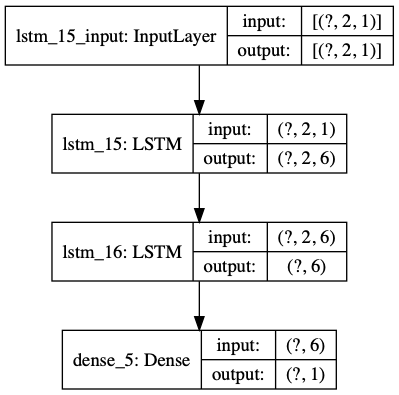

In [70]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [71]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.mean_squared_error
)

In [72]:
epochs_num = 100

history = model.fit(
    x=shaped_X,
    y=normY,
    epochs=epochs_num
)

Train on 50 samples
Epoch 1/100
50/50 [==============================] - 3s 59ms/sample - loss: 1.2869
Epoch 2/100
50/50 [==============================] - 0s 492us/sample - loss: 1.2765
Epoch 3/100
50/50 [==============================] - 0s 391us/sample - loss: 1.2660
Epoch 4/100
50/50 [==============================] - 0s 529us/sample - loss: 1.2559
Epoch 5/100
50/50 [==============================] - 0s 384us/sample - loss: 1.2461
Epoch 6/100
50/50 [==============================] - 0s 344us/sample - loss: 1.2362
Epoch 7/100
50/50 [==============================] - 0s 331us/sample - loss: 1.2264
Epoch 8/100
50/50 [==============================] - 0s 353us/sample - loss: 1.2167
Epoch 9/100
50/50 [==============================] - 0s 383us/sample - loss: 1.2066
Epoch 10/100
50/50 [==============================] - 0s 444us/sample - loss: 1.1969
Epoch 11/100
50/50 [==============================] - 0s 276us/sample - loss: 1.1874
Epoch 12/100
50/50 [==============================] - 0

50/50 [==============================] - 0s 408us/sample - loss: 0.0872
Epoch 97/100
50/50 [==============================] - 0s 395us/sample - loss: 0.0869
Epoch 98/100
50/50 [==============================] - 0s 477us/sample - loss: 0.0867
Epoch 99/100
50/50 [==============================] - 0s 432us/sample - loss: 0.0866
Epoch 100/100
50/50 [==============================] - 0s 422us/sample - loss: 0.0863


In [73]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

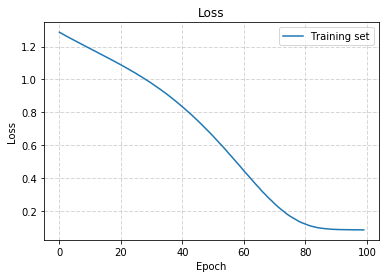

In [74]:
render_training_history(history)